<a href="https://colab.research.google.com/github/rbnati/prouni2020_hypothesis_test/blob/main/(PROUNI_2020)_Projeto_Final_Teste_de_Hip%C3%B3tese_Qui_quadrado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANÁLISE EXPLORATÓRIA** 
- Distribuição por região
- Distribuição por raça x Dados do IBGE
- Distribuição por tipo de bolsa
- Distribuição por modalidade
- Distribuição por sexo x Dados do IBGE

**TESTE HIPÓTESE**

- Existe dependência entre modalidade (EAD e presencial) e região?
- Existe dependência entre modalidade (EAD e presencial) e sexo?
- Existe dependência entre tipo de bolsa (total e parcial) e região?
- Existe dependência entre tipo de bolsa (total e parcial) e raça?

**ROTEIRO APRESENTAÇÃO**
- Contextualização
- Objetivo
- Justificativa
- Coleta de dados
- Análise exploratória
- Distribuições
- Teste de hipótese qui-quadrado
- Análise dos resultados
- Documentação




#Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

# 1) Carregando o dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataframe_2020 = pd.read_excel('/content/drive/MyDrive/Estatística/PROUNI EXCEL/Dados PROUNI (2020).xlsx', index_col=0)
dataframe_2020.head()

,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
ANO_CONCESSAO_BOLSA,,,,,,,,,,,,,,,,
2020,322,UNIVERSIDADE PAULISTA,IPATINGA,IPATINGA,INTEGRAL,EAD,PEDAGOGIA,CURSO A DIST¶NCIA,991.XXX.XXX-91,F,Parda,1973-08-11,N,SUDESTE,MG,GOVERNADOR VALADARES
2020,163,UNIVERSIDADE ESTµCIO DE Sµ,FORTALEZA,EAD VIA CORPVS - CE,INTEGRAL,EAD,MARKETING,CURSO A DIST¶NCIA,067.XXX.XXX-01,M,Parda,1987-05-13,N,NORDESTE,CE,FORTALEZA
2020,17670,FACULDADE DE QUIXERAMOBIM,QUIXERAMOBIM,FACULDADE DE QUIXERAMOBIM - UNIQ,INTEGRAL,PRESENCIAL,FARMµCIA,NOTURNO,623.XXX.XXX-27,M,Parda,2001-07-23,N,NORDESTE,CE,MOMBACA
2020,203,UNIVERSIDADE SÇO JUDAS TADEU,SAO PAULO,PAULISTA,PARCIAL,PRESENCIAL,DIREITO,MATUTINO,089.XXX.XXX-40,F,Branca,2003-04-04,N,NORDESTE,BA,IBITITA
2020,203,UNIVERSIDADE SÇO JUDAS TADEU,SAO PAULO,PAULISTA,INTEGRAL,PRESENCIAL,DIREITO,MATUTINO,173.XXX.XXX-09,F,Branca,1977-12-07,N,SUDESTE,SP,SAO PAULO


# 2) Verificando e eliminando itens com valores nulos dos datasets

In [ ]:
pd.isnull(dataframe_2020).sum()

CODIGO_EMEC_IES_BOLSA              0
NOME_IES_BOLSA                     0
MUNICIPIO                          0
CAMPUS                             0
TIPO_BOLSA                         0
MODALIDADE_ENSINO_BOLSA            0
NOME_CURSO_BOLSA                  38
NOME_TURNO_CURSO_BOLSA             0
CPF_BENEFICIARIO                   0
SEXO_BENEFICIARIO_BOLSA            0
RACA_BENEFICIARIO_BOLSA            0
DATA_NASCIMENTO                    0
BENEFICIARIO_DEFICIENTE_FISICO     0
REGIAO_BENEFICIARIO_BOLSA          0
UF_BENEFICIARIO                    0
MUNICIPIO_BENEFICIARIO             0
dtype: int64

In [ ]:
dataframe_2020_clean = dataframe_2020.dropna()
dataframe_2020_clean.head()

,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
ANO_CONCESSAO_BOLSA,,,,,,,,,,,,,,,,
2020,322,UNIVERSIDADE PAULISTA,IPATINGA,IPATINGA,INTEGRAL,EAD,PEDAGOGIA,CURSO A DIST¶NCIA,991.XXX.XXX-91,F,Parda,1973-08-11,N,SUDESTE,MG,GOVERNADOR VALADARES
2020,163,UNIVERSIDADE ESTµCIO DE Sµ,FORTALEZA,EAD VIA CORPVS - CE,INTEGRAL,EAD,MARKETING,CURSO A DIST¶NCIA,067.XXX.XXX-01,M,Parda,1987-05-13,N,NORDESTE,CE,FORTALEZA
2020,17670,FACULDADE DE QUIXERAMOBIM,QUIXERAMOBIM,FACULDADE DE QUIXERAMOBIM - UNIQ,INTEGRAL,PRESENCIAL,FARMµCIA,NOTURNO,623.XXX.XXX-27,M,Parda,2001-07-23,N,NORDESTE,CE,MOMBACA
2020,203,UNIVERSIDADE SÇO JUDAS TADEU,SAO PAULO,PAULISTA,PARCIAL,PRESENCIAL,DIREITO,MATUTINO,089.XXX.XXX-40,F,Branca,2003-04-04,N,NORDESTE,BA,IBITITA
2020,203,UNIVERSIDADE SÇO JUDAS TADEU,SAO PAULO,PAULISTA,INTEGRAL,PRESENCIAL,DIREITO,MATUTINO,173.XXX.XXX-09,F,Branca,1977-12-07,N,SUDESTE,SP,SAO PAULO


In [ ]:
pd.isnull(dataframe_2020_clean).sum()

CODIGO_EMEC_IES_BOLSA             0
NOME_IES_BOLSA                    0
MUNICIPIO                         0
CAMPUS                            0
TIPO_BOLSA                        0
MODALIDADE_ENSINO_BOLSA           0
NOME_CURSO_BOLSA                  0
NOME_TURNO_CURSO_BOLSA            0
CPF_BENEFICIARIO                  0
SEXO_BENEFICIARIO_BOLSA           0
RACA_BENEFICIARIO_BOLSA           0
DATA_NASCIMENTO                   0
BENEFICIARIO_DEFICIENTE_FISICO    0
REGIAO_BENEFICIARIO_BOLSA         0
UF_BENEFICIARIO                   0
MUNICIPIO_BENEFICIARIO            0
dtype: int64

In [ ]:
len(dataframe_2020_clean)

166792

# 3) Verificando as categorias presentes em cada variável de interesse

In [ ]:
dataframe_2020_clean["REGIAO_BENEFICIARIO_BOLSA"].unique()

array(['SUDESTE', 'NORDESTE', 'SUL', 'CENTRO-OESTE', 'NORTE'],
      dtype=object)

In [ ]:
dataframe_2020["MODALIDADE_ENSINO_BOLSA"].unique()


array(['EAD', 'PRESENCIAL'], dtype=object)

In [ ]:
dataframe_2020["TIPO_BOLSA"].unique()

array(['INTEGRAL', 'PARCIAL'], dtype=object)

In [ ]:
dataframe_2020["RACA_BENEFICIARIO_BOLSA"].unique()

array(['Parda', 'Branca', 'Preta', 'Amarela', 'NÆo Informada', 'Ind¡gena'],
      dtype=object)

In [ ]:
dataframe_2020["SEXO_BENEFICIARIO_BOLSA"].unique()

array(['F', 'M'], dtype=object)

# 4) Análise exploratória 

## 4.1) Por região

In [ ]:
frequency_by_region = pd.DataFrame(dataframe_2020_clean["REGIAO_BENEFICIARIO_BOLSA"].value_counts()).sort_index(ascending=False)
frequency_by_region = frequency_by_region.rename(columns={"REGIAO_BENEFICIARIO_BOLSA":"nº beneficiários"})
frequency_by_region = frequency_by_region.sort_values(by="nº beneficiários", ascending=True)
frequency_by_region

,nº beneficiários
CENTRO-OESTE,13254
NORTE,16297
SUL,26368
NORDESTE,39244
SUDESTE,71629


In [ ]:
region = ["Centro-Oeste", "Norte", "Sul", "Nordeste", "Sudeste"]
total_by_region = [13254,16297,26368,39244,71629]

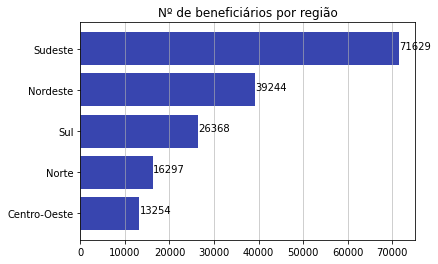

In [ ]:
plt.barh(region, total_by_region, align='center', color='#3845AF')
plt.ylabel("")
plt.xlabel("") 
plt.title("Nº de beneficiários por região")
plt.grid(axis='x', alpha=0.75)

for index, value in enumerate(total_by_region):
    plt.text(value, index,
             str(value))
  
plt.show()

## 4.2) Por raça

In [ ]:
frequency_by_race = pd.DataFrame(dataframe_2020_clean["RACA_BENEFICIARIO_BOLSA"].value_counts()).sort_index(ascending=False)
frequency_by_race = frequency_by_race.rename(columns={"RACA_BENEFICIARIO_BOLSA":"nº beneficiários"})
frequency_by_race = frequency_by_race.sort_values(by="nº beneficiários", ascending=True)
frequency_by_race

,nº beneficiários
NÆo Informada,68
Ind¡gena,153
Amarela,2900
Preta,21151
Branca,64463
Parda,78057


In [ ]:
race = ["Não informada","Indígena","Amarela","Preta","Branca","Parda"]
total_by_race = [68,153,2900,21151,64463,78057]

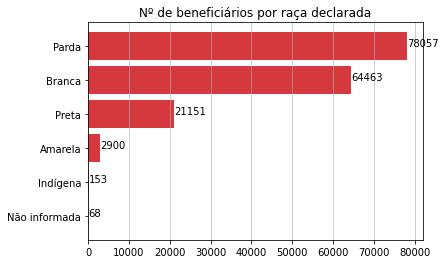

In [ ]:
plt.barh(race, total_by_race, align='center', color='#D5393D')
plt.ylabel("")
plt.xlabel("") 
plt.title("Nº de beneficiários por raça declarada")
plt.grid(axis='x', alpha=0.75)

for index, value in enumerate(total_by_race):
    plt.text(value, index,
             str(value))
  
plt.show()

## 4.3) Por tipo de bolsa

In [ ]:
frequency_by_benefit = pd.DataFrame(dataframe_2020_clean["TIPO_BOLSA"].value_counts()).sort_index(ascending=False)
frequency_by_benefit = frequency_by_benefit.rename(columns={"TIPO_BOLSA":"nº beneficiários"})
frequency_by_benefit = frequency_by_benefit.sort_values(by="nº beneficiários", ascending=True)
frequency_by_benefit

,nº beneficiários
PARCIAL,36081
INTEGRAL,130711


In [ ]:
benefit = ["Parcial","Integral"]
total_by_benefit = [36081,130711]

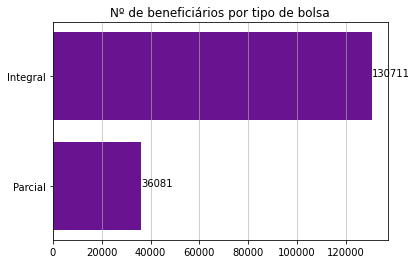

In [ ]:
plt.barh(benefit, total_by_benefit, align='center', color='#6A1391')
plt.ylabel("")
plt.xlabel("") 
plt.title("Nº de beneficiários por tipo de bolsa")
plt.grid(axis='x', alpha=0.75)

for index, value in enumerate(total_by_benefit):
    plt.text(value, index,
             str(value))
  
plt.show()

## 4.4) Por modalidade do curso

In [ ]:
frequency_by_modality = pd.DataFrame(dataframe_2020_clean["MODALIDADE_ENSINO_BOLSA"].value_counts()).sort_index(ascending=False)
frequency_by_modality = frequency_by_modality.rename(columns={"MODALIDADE_ENSINO_BOLSA":"nº beneficiários"})
frequency_by_modality = frequency_by_modality.sort_values(by="nº beneficiários", ascending=True)
frequency_by_modality

,nº beneficiários
EAD,53819
PRESENCIAL,112973


In [ ]:
modality = ["EAD","Presencial"]
total_by_modality = [53819,112973]

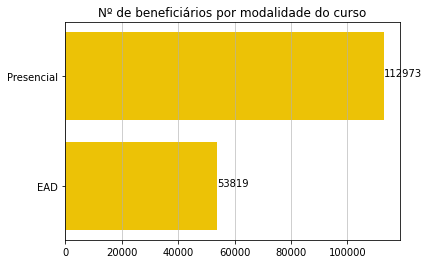

In [ ]:
plt.barh(modality, total_by_modality, align='center', color='#ECC206')
plt.ylabel("")
plt.xlabel("") 
plt.title("Nº de beneficiários por modalidade do curso")
plt.grid(axis='x', alpha=0.75)

for index, value in enumerate(total_by_modality):
    plt.text(value, index,
             str(value))
  
plt.show()

## 4.5) Por sexo

In [ ]:
frequency_by_genre = pd.DataFrame(dataframe_2020_clean["SEXO_BENEFICIARIO_BOLSA"].value_counts()).sort_index(ascending=False)
frequency_by_genre = frequency_by_genre.rename(columns={"SEXO_BENEFICIARIO_BOLSA":"nº beneficiários"})
frequency_by_genre = frequency_by_genre.sort_values(by="nº beneficiários", ascending=True)
frequency_by_genre

,nº beneficiários
M,65675
F,101117


In [ ]:
genre = ["Masculino","Feminino"]
total_by_genre = [65675,101117]

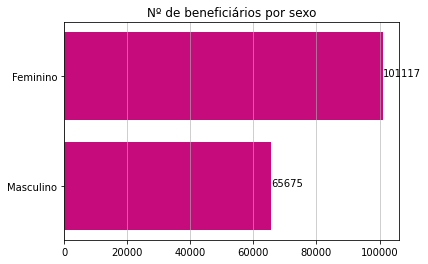

In [ ]:
plt.barh(genre, total_by_genre, align='center', color='#C60C7D')
plt.ylabel("")
plt.xlabel("") 
plt.title("Nº de beneficiários por sexo")
plt.grid(axis='x', alpha=0.75)

for index, value in enumerate(total_by_genre):
    plt.text(value, index,
             str(value))
  
plt.show()

# 5) Realizando os Testes de Hipótese

- Existe dependência entre modalidade (EAD e presencial) e região do beneficiário?
- Existe dependência entre modalidade (EAD e presencial) e sexo do beneficiário?
- Existe dependência entre tipo de bolsa (total e parcial) e região do beneficiário?
- Existe dependência entre tipo de bolsa (total e parcial) e raça declarada pelo beneficiário?


In [ ]:
dataframe_2020_clean.head()

,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
ANO_CONCESSAO_BOLSA,,,,,,,,,,,,,,,,
2020,322,UNIVERSIDADE PAULISTA,IPATINGA,IPATINGA,INTEGRAL,EAD,PEDAGOGIA,CURSO A DIST¶NCIA,991.XXX.XXX-91,F,Parda,1973-08-11,N,SUDESTE,MG,GOVERNADOR VALADARES
2020,163,UNIVERSIDADE ESTµCIO DE Sµ,FORTALEZA,EAD VIA CORPVS - CE,INTEGRAL,EAD,MARKETING,CURSO A DIST¶NCIA,067.XXX.XXX-01,M,Parda,1987-05-13,N,NORDESTE,CE,FORTALEZA
2020,17670,FACULDADE DE QUIXERAMOBIM,QUIXERAMOBIM,FACULDADE DE QUIXERAMOBIM - UNIQ,INTEGRAL,PRESENCIAL,FARMµCIA,NOTURNO,623.XXX.XXX-27,M,Parda,2001-07-23,N,NORDESTE,CE,MOMBACA
2020,203,UNIVERSIDADE SÇO JUDAS TADEU,SAO PAULO,PAULISTA,PARCIAL,PRESENCIAL,DIREITO,MATUTINO,089.XXX.XXX-40,F,Branca,2003-04-04,N,NORDESTE,BA,IBITITA
2020,203,UNIVERSIDADE SÇO JUDAS TADEU,SAO PAULO,PAULISTA,INTEGRAL,PRESENCIAL,DIREITO,MATUTINO,173.XXX.XXX-09,F,Branca,1977-12-07,N,SUDESTE,SP,SAO PAULO


## 5.1) Teste de Hipótese 1: existe dependência entre modalidade do curso e região do beneficiário?

### Criando tabela de contingência (frequências observadas)

In [ ]:
#Tabela com total
frequency_observed1A = pd.crosstab(index=dataframe_2020_clean["MODALIDADE_ENSINO_BOLSA"],
                    columns = dataframe_2020_clean["REGIAO_BENEFICIARIO_BOLSA"],
                    margins = True)

frequency_observed1A

REGIAO_BENEFICIARIO_BOLSA,CENTRO-OESTE,NORDESTE,NORTE,SUDESTE,SUL,All
MODALIDADE_ENSINO_BOLSA,,,,,,
EAD,4056,12602,7031,18257,11873,53819
PRESENCIAL,9198,26642,9266,53372,14495,112973
All,13254,39244,16297,71629,26368,166792


In [ ]:
## Tabela sem total (para cálculo do qui-quadrado)
frequency_observed1B = pd.crosstab(index=dataframe_2020_clean["MODALIDADE_ENSINO_BOLSA"],
                    columns = dataframe_2020_clean["REGIAO_BENEFICIARIO_BOLSA"])

frequency_observed1B

REGIAO_BENEFICIARIO_BOLSA,CENTRO-OESTE,NORDESTE,NORTE,SUDESTE,SUL
MODALIDADE_ENSINO_BOLSA,,,,,
EAD,4056,12602,7031,18257,11873
PRESENCIAL,9198,26642,9266,53372,14495


### Calculando frequências esperadas e qui-quadrado da Hipótese 1

In [ ]:
stat1, p1, dof1, expected1 = chi2_contingency(frequency_observed1B)
print("qui-quadrado total: ", stat1)
print("p-value: ", p1)
print("graus de liberdade: ", dof1)
print("frequências esperadas: ", expected1)

qui-quadrado total:  4369.938240768281
p-value:  0.0
graus de liberdade:  4
frequências esperadas:  [[ 4276.68608806 12662.91450429  5258.57500959 23112.62621109
   8508.19818696]
 [ 8977.31391194 26581.08549571 11038.42499041 48516.37378891
  17859.80181304]]


### Conclusão do Teste de hipótese 1

In [ ]:
# Interpretando estatística do teste
confidence = 0.95
critical1 = chi2.ppf(confidence, dof1)
if abs(stat1) >= critical1:
	print('Dependente (rejeitar H0)')
else:
	print('Independente (não é possível rejeitar H0)')

Dependente (rejeitar H0)


In [ ]:
#Interpretando  p-value
alpha = 1.0 - confidence
if p1 <= alpha:
	print('Dependente (rejeitar H0)')
else:
	print('Independente (não é possível rejeitar H0)')

Dependente (rejeitar H0)


## 5.2) Teste de Hipótese 2: existe dependência entre modalidade do curso e sexo?

### Criando tabela de contingência (frequências observadas)

In [ ]:
# Tabela com total
frequency_observed2A = pd.crosstab(index=dataframe_2020_clean["MODALIDADE_ENSINO_BOLSA"],
                    columns = dataframe_2020_clean["SEXO_BENEFICIARIO_BOLSA"],
                    margins = True)

frequency_observed2A

SEXO_BENEFICIARIO_BOLSA,F,M,All
MODALIDADE_ENSINO_BOLSA,,,
EAD,33069,20750,53819
PRESENCIAL,68048,44925,112973
All,101117,65675,166792


In [ ]:
# Tabela sem total (para cálculo do qui-quadrado)
frequency_observed2B = pd.crosstab(index=dataframe_2020_clean["MODALIDADE_ENSINO_BOLSA"],
                    columns = dataframe_2020_clean["SEXO_BENEFICIARIO_BOLSA"])

frequency_observed2B

SEXO_BENEFICIARIO_BOLSA,F,M
MODALIDADE_ENSINO_BOLSA,,
EAD,33069,20750
PRESENCIAL,68048,44925


### Calculando frequências esperadas e qui-quadrado da Hipótese 2

In [ ]:
stat2, p2, dof2, expected2 = chi2_contingency(frequency_observed2B)
print("qui-quadrado total: ", stat2)
print("p-value: ", p2)
print("graus de liberdade: ", dof2)
print("frequências esperadas: ", expected2)

qui-quadrado total:  22.343543220200083
p-value:  2.2797825911415233e-06
graus de liberdade:  1
frequências esperadas:  [[32627.55901362 21191.44098638]
 [68489.44098638 44483.55901362]]


### Conclusão do Teste de hipótese 2

In [ ]:
# Interpretando estatística do teste
confidence = 0.95
critical2 = chi2.ppf(confidence, dof2)
if abs(stat2) >= critical2:
	print('Dependente (rejeitar H0)')
else:
	print('Independente (não é possível rejeitar H0)')

Dependente (rejeitar H0)


In [ ]:
#Interpretando  p-value
alpha = 1.0 - confidence
if p2 <= alpha:
	print('Dependente (rejeitar H0)')
else:
	print('Independente (não é possível rejeitar H0)')

Dependente (rejeitar H0)


## 5.3) Teste de Hipótese 3: existe dependência entre tipo de bolsa e região do beneficiário?

### Criando tabela de contingência (frequências observadas)

In [ ]:
# Tabela com total
frequency_observed3A = pd.crosstab(index=dataframe_2020_clean["TIPO_BOLSA"],
                    columns = dataframe_2020_clean["REGIAO_BENEFICIARIO_BOLSA"],
                    margins = True)

frequency_observed3A

REGIAO_BENEFICIARIO_BOLSA,CENTRO-OESTE,NORDESTE,NORTE,SUDESTE,SUL,All
TIPO_BOLSA,,,,,,
INTEGRAL,9866,28643,12945,59213,20044,130711
PARCIAL,3388,10601,3352,12416,6324,36081
All,13254,39244,16297,71629,26368,166792


In [ ]:
# Tabela sem total (para cálculo do qui-quadrado)
frequency_observed3B = pd.crosstab(index=dataframe_2020_clean["TIPO_BOLSA"],
                    columns = dataframe_2020_clean["REGIAO_BENEFICIARIO_BOLSA"])

frequency_observed3B

REGIAO_BENEFICIARIO_BOLSA,CENTRO-OESTE,NORDESTE,NORTE,SUDESTE,SUL
TIPO_BOLSA,,,,,
INTEGRAL,9866,28643,12945,59213,20044
PARCIAL,3388,10601,3352,12416,6324


### Calculando frequências esperadas e qui-quadrado da Hipótese 3

In [ ]:
stat3, p3, dof3, expected3 = chi2_contingency(frequency_observed3B)
print("qui-quadrado total: ", stat3)
print("p-value: ", p3)
print("graus de liberdade: ", dof3)
print("frequências esperadas: ", expected3)

qui-quadrado total:  1668.547921413668
p-value:  0.0
graus de liberdade:  4
frequências esperadas:  [[10386.85065231 30754.60743921 12771.57877476 56133.97656362
  20663.9865701 ]
 [ 2867.14934769  8489.39256079  3525.42122524 15495.02343638
   5704.0134299 ]]


### Conclusão do Teste de hipótese 3

In [ ]:
# Interpretando estatística do teste
confidence = 0.95
critical3 = chi2.ppf(confidence, dof3)
if abs(stat3) >= critical2:
	print('Dependente (rejeitar H0)')
else:
	print('Independente (não é possível rejeitar H0)')

Dependente (rejeitar H0)


In [ ]:
#Interpretando  p-value
alpha = 1.0 - confidence
if p3 <= alpha:
	print('Dependente (rejeitar H0)')
else:
	print('Independente (não é possível rejeitar H0)')

Dependente (rejeitar H0)


## 5.4) Teste de Hipótese 4: existe dependência entre tipo de bolsa e raça?

### Criando tabela de contingência (frequências observadas)

In [ ]:
#Tabela com total
frequency_observed4A = pd.crosstab(index=dataframe_2020_clean["TIPO_BOLSA"],
                    columns = dataframe_2020_clean["RACA_BENEFICIARIO_BOLSA"],
                    margins = True)

frequency_observed4A

RACA_BENEFICIARIO_BOLSA,Amarela,Branca,Ind¡gena,NÆo Informada,Parda,Preta,All
TIPO_BOLSA,,,,,,,
INTEGRAL,2082,49552,136,64,61621,17256,130711
PARCIAL,818,14911,17,4,16436,3895,36081
All,2900,64463,153,68,78057,21151,166792


In [ ]:
# Tabela sem total (para cálculo do qui-quadrado)
frequency_observed4B = pd.crosstab(index=dataframe_2020_clean["TIPO_BOLSA"],
                    columns = dataframe_2020_clean["RACA_BENEFICIARIO_BOLSA"])

frequency_observed4B

RACA_BENEFICIARIO_BOLSA,Amarela,Branca,Ind¡gena,NÆo Informada,Parda,Preta
TIPO_BOLSA,,,,,,
INTEGRAL,2082,49552,136,64,61621,17256
PARCIAL,818,14911,17,4,16436,3895


### Calculando frequências esperadas e qui-quadrado da Hipótese 4

In [ ]:
stat4, p4, dof4, expected4 = chi2_contingency(frequency_observed4B)
print("qui-quadrado total: ", stat4)
print("p-value: ", p4)
print("graus de liberdade: ", dof4)
print("frequências esperadas: ", expected4)

qui-quadrado total:  323.7006315808474
p-value:  8.004860986042118e-68
graus de liberdade:  5
frequências esperadas:  [[2.27266236e+03 5.05181495e+04 1.19902531e+02 5.32900139e+01
  6.11714502e+04 1.65755454e+04]
 [6.27337642e+02 1.39448505e+04 3.30974687e+01 1.47099861e+01
  1.68855498e+04 4.57545464e+03]]


### Conclusão do Teste de hipótese 4

In [ ]:
# Interpretando estatística do teste
confidence = 0.95
critical4 = chi2.ppf(confidence, dof4)
if abs(stat4) >= critical4:
	print('Dependente (rejeitar H0)')
else:
	print('Independente (não é possível rejeitar H0)')

Dependente (rejeitar H0)


In [ ]:
#Interpretando  p-value
alpha = 1.0 - confidence
if p4 <= alpha:
	print('Dependente (rejeitar H0)')
else:
	print('Independente (não é possível rejeitar H0)')

Dependente (rejeitar H0)


In [ ]:
dataframe_2020_clean.to_excel("prouni_2020.xlsx")